In [4]:
import pandas as pd
import datetime
import ast

In [2]:
ratings = pd.read_csv("Books_rating.csv")
books_data = pd.read_csv("books_data.csv")

In [12]:
ratings.head()

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB


In [6]:
ratings.isna().sum()

Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64

In [11]:
ratings.nunique()

Id              221998
Title           212403
Price             6004
User_id        1008972
profileName     854145
score                5
time              6272
summary        1592314
text           2062648
dtype: int64

In [9]:
ratings[ratings.duplicated(keep=False)]

,Id,Title,Price,User_id,profileName,score,time,summary,text
253,0312322291,King James: Believe the Hype---The LeBron Jame...,NaN,NaN,NaN,4.0,1130457600,"Stephen F. Miller Place, NY",King James by Ryan Jones is a biography of Leb...
256,0312322291,King James: Believe the Hype---The LeBron Jame...,NaN,NaN,NaN,4.0,1130457600,"Stephen F. Miller Place, NY",King James by Ryan Jones is a biography of Leb...
422,0671551345,Night World: Daughters Of Darkness,NaN,NaN,NaN,5.0,895968000,EXCELLENT!!!!!!!!!!!,This book was outstanding! I couldn't put it d...
423,0671551345,Night World: Daughters Of Darkness,NaN,NaN,NaN,5.0,895968000,EXCELLENT!!!!!!!!!!!,This book was outstanding! I couldn't put it d...
428,0671551345,Night World: Daughters Of Darkness,NaN,NaN,NaN,5.0,878601600,One of my Favorites,"I was sceptical about this book at first, I ha..."
...,...,...,...,...,...,...,...,...,...
2999626,B000P91JYW,Jane Eyre,NaN,A1288XI5LO0J76,Senior High,4.0,1080691200,Jane Eyre,"Jane Eyre, by Charlotte Bronte, is an enticing..."
2999688,B000P91JYW,Jane Eyre,NaN,A1H59JRV8YR1EU,SA,1.0,1021852800,Jane Eyre Book Review,The novel Jane Eyre by Charlotte Bronte is a t...
2999690,B000P91JYW,Jane Eyre,NaN,A1H59JRV8YR1EU,SA,1.0,1021852800,Jane Eyre Book Review,The novel Jane Eyre by Charlotte Bronte is a t...
2999827,0762417137,Adventures Of Pinocchio,NaN,A36K2N527TXXJN,Dr. Bojan Tunguz,5.0,1294444800,Boys who do not listen to their elders always ...,Pinocchio is one of the most beloved and recog...


In [10]:
ratings = ratings.drop_duplicates(keep='first')

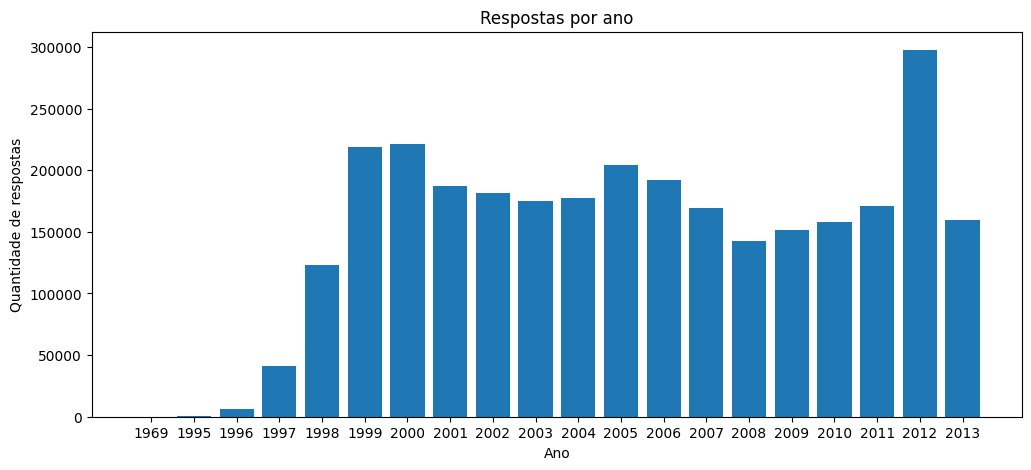

In [21]:
import matplotlib.pyplot as plt

anos_count = ratings["time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y")).value_counts().reset_index()

anos_count = anos_count.sort_values(by="time").reset_index(drop=True)

counts = anos_count["count"]
anos = anos_count["time"]

plt.figure(figsize=(12,5))
plt.bar(anos, counts)

plt.title("Respostas por ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de respostas")

plt.show()

In [22]:
ratings["tempo_ajustado"] = ratings["time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

ratings = ratings[ratings["tempo_ajustado"]>="1998-01-01"].reset_index(drop=True)

/tmp/ipykernel_1293/2600718718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["tempo_ajustado"] = ratings["time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d"))


In [23]:
ratings[ratings["Title"].isna()]

,Id,Title,Price,User_id,profileName,score,time,summary,text,tempo_ajustado
12747,B00005XZDV,NaN,NaN,AY44TQ8XGQ7RR,"readersblock ""ZuZu""",5.0,1077667200,A good book...read it!,In an era of other prolific writers such as Ja...,2004-02-25
350617,0801841119,NaN,17.95,NaN,NaN,2.0,903830400,Strange adapted translations of Virgil's poems.,"I only read Georgics in this book, but I'm not...",1998-08-23
350618,0801841119,NaN,17.95,A3F19JZZ07PDX0,Philippe Landry,1.0,1121904000,Do Not Get This Translation!,You can't even really call this a translation;...,2005-07-21
350619,0801841119,NaN,17.95,A1JO4MQFLXGYVS,Okla Elliott,5.0,1048291200,Giving Life Back to a Dead Language and a Dead...,Slavitt's translation of Virgil's Eclogues and...,2003-03-22
421915,0595241034,NaN,14.95,A1ASFZRH6ZLCOE,"""ajm502""",4.0,1046044800,Still trying to figure it out....Thanks for no...,I can definitely relate to the story line in D...,2003-02-24
...,...,...,...,...,...,...,...,...,...,...
2761130,059528812X,NaN,NaN,A6SZZSMX7DQG1,Elly Sparks,5.0,1262736000,"Wry, Witty, and True Mystery","This is a great book about friendship, loyalty...",2010-01-06
2761131,059528812X,NaN,NaN,A352HZ1YURWGVL,Erin P,1.0,1261008000,Terrible,I saw this title in my local library on the do...,2009-12-17
2761132,059528812X,NaN,NaN,A2VPLBU4M5NUXV,Sara,5.0,1064707200,Bone deep emotional truth,Justify The Means offers bone-deep emotional t...,2003-09-28
2761133,059528812X,NaN,NaN,AVDFWLRZRBTMI,Gary,5.0,1064707200,A FRESH VOICE,"With keen prose and an extraordinary eye, Madi...",2003-09-28


In [24]:
ratings = ratings[~ratings["Title"].isna()].reset_index(drop=True)

In [25]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
